In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

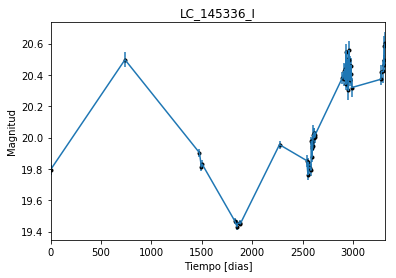

In [4]:
data = np.genfromtxt('LC_145336_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_145336_I')
plt.savefig("LC_145336_I.pdf")

In [5]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [6]:
%%capture capt
sample = model.run_mcmc(20000)

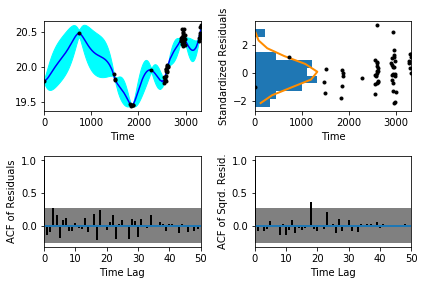

In [7]:
sample.assess_fit()

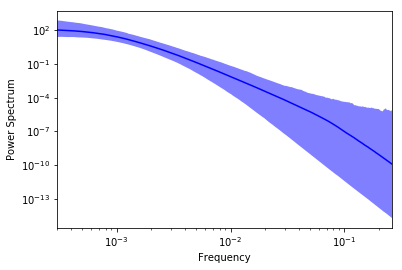

In [8]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [9]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

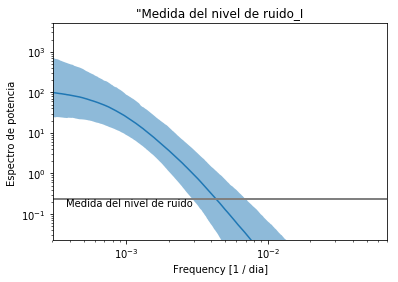

In [10]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_145336_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_145336_I')

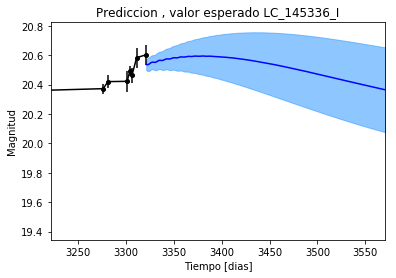

In [11]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_145336_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_145336_I')

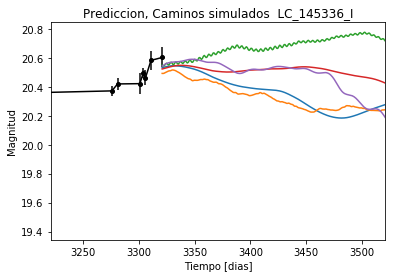

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_145336_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


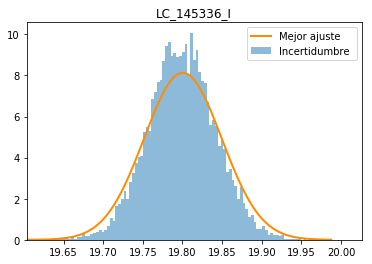

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_145336_I')
plt.savefig("Mejor_ajuste_LC_145336_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_145336_I')

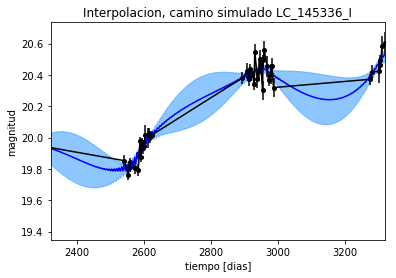

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_145336_I')

Text(0.5,1,'Interpolacion, camino simulado LC_145336_I')

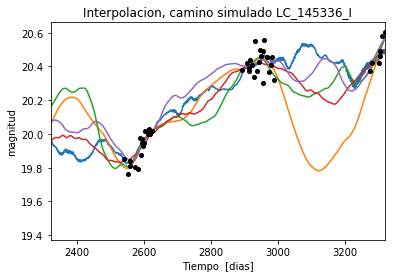

In [15]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_145336_I')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 515.676076067
Median: 0.0104278458688
Standard deviation: 0.109377503497
68% credibility interval: [ 0.00083692  0.12229007]
95% credibility interval: [  3.51346248e-04   4.31352187e-01]
99% credibility interval: [  3.10511654e-04   5.03333686e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 530.213700755
Median: 0.00119523891626
Standard deviation: 0.0316008040317
68% credibility interval: [ 0.0004291   0.01100824]
95% credibility interval: [ 0.00031101  0.09189454]
99% credibility interval: [ 0.0003048   0.22040537]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 427.56164795
Median: 0.00611054296568
Standard deviation:

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 745.171432946
Median: 82.6536216174
Standard deviation: 1.61335301303
68% credibility interval: [ 80.80999635  83.8092918 ]
95% credibility interval: [ 78.40288854  84.52973473]
99% credibility interval: [ 76.6240307  85.229169 ]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 715.190643133
Median: 0.397381855456
Standard deviation: 1.10023227008
68% credibility interval: [ 0.04528452  2.03581113]
95% credibility interval: [ 0.01369701  3.69025315]
99% credibility interval: [ 0.009793    5.35138855]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 670.032613629
Median: 0.117424606437
Standard deviation: 2.0330961415
68% credibility interval: [ 0.00658646  2.19884342]
95% credibility interval: [  6.90004314e-04

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 303.651298111
Median: 9.75113128089e-15
Standard deviation: 1.70711293725e+62
68% credibility interval: [  4.20354690e-43   4.33391312e+00]
95% credibility interval: [  2.81404548e-69   2.72720767e+43]
99% credibility interval: [  6.12051727e-95   3.19214482e+62]


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3044.74421111
Median: 20.086224986
Standard deviation: 0.244526672855
68% credibility interval: [ 19.90753752  20.28402547]
95% credibility interval: [ 19.61115671  20.60136982]
99% credibility interval: [ 19.22438321  20.95581037]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 353.146611645
Median: 0.000482280086774
Standard deviation: 0.120938330578
68% credibility interval: [ 0.        0.182689]
95% credibility interval: [ 0.          0.42343966]
99% credibility interval: [ 0.          0.50214558]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 353.146611645
Median: 0.000482280086774
Standard deviation: 0.120938330578
68% credibility interval: [ 0.        0.182689]
95% credibility interval: [ 0.          0.42343966]
99% credibility interval: [ 0.          0.50214558]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1475.96439689
Median: 0.0
Standard deviation: 0.000278604285897
68% credib

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 745.171432946
Median: 82.6536216174
Standard deviation: 1.61335301303
68% credibility interval: [ 80.80999635  83.8092918 ]
95% credibility interval: [ 78.40288854  84.52973473]
99% credibility interval: [ 76.6240307  85.229169 ]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1254.1475189
Median: 0.18462710982
Standard deviation: 0.272375182643
68% credibility interval: [ 0.10588691  0.39147479]
95% credibility interval: [ 0.0674919   0.99811695]
99% credibility interval: [ 0.05208298  1.78296731]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2292.18522693
Median: 1.2940090706
Standard deviation: 0.197784551241
68% credibility interval: [ 1.12223119  1.51222998]
95% credibility interval: [ 0.97569488  1.75761988]
99% credibility interval: [ 0.90660917  1.89850241]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 407.14256205
Median: 4.26197810189e-05
Standard deviation: 0.001160219198
68% credibility interval: [  7.83676860e-07   9.03688982e-04]
95% credibility interval: [  2.05304156e-47   3.82260420e-03]
99% credibility interval: [  5.33221202e-67   7.25441187e-03]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 515.676076067
Median: (-0.0655200879483-0.704957156656j)
Standard deviation: 1.02455458539
68% credibility interval: [-0.76837119+0.j         -0.00525855-1.95550104j]
95% credibility interval: [ -2.71026572e+00+0.j          -2.20757358e-03-0.00382857j]
99% credibility interval: [ -3.16253882e+00+0.j          -1.95100226e-03-0.00244831j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 530.213700755
Median: (-0.00750990759724+0.00152482403349j)
Standard deviation: 0.785390387753
68% credibility interval: [-0.06916684+0.j -0.00269609+0.j]
95% credibility interval: [-0.57739044+2.61582433j -0.00195416+0.00299774j]
99% credibility interval: [-1.38484781+2.07596687j -0.00191514+0.j        ]
Posterior summary for parameter ar